In [1]:
import pandas as pd
import json
import requests
import re
from bs4 import BeautifulSoup

## Search city and food type
Get a list of businesses and their info:
- Name
- Address
- Star Rating
- Price Range
- Number of Reviews
- URL for business Yelp review page
- URL for image used as business icon

In [344]:
#ENTER SEARCH TERMS BELOW:
cuisine_type = "Gastropubs"
location = "Albany, NY"

#Generate URL based on search terms
base_url = "https://www.yelp.com"
search_url = f"{base_url}/search?find_desc={cuisine_type}&find_loc={location}"

In [345]:
#Search Term: beer
#Filters: Breweries, Pubs, Beergardens, Gastropubs, Brewpubs, Beerbar
search_url = "https://www.yelp.com/search?find_desc=beer&find_loc=Albany%2C%20NY&cflt=breweries%2Cpubs%2Cbeergardens%2Cgastropubs%2Cbrewpubs%2Cbeerbar"

In [261]:
#request = requests.get(search_url)
#soup = BeautifulSoup(request.content,'html.parser')

In [346]:
star_container_class = "lemon--div__373c0__1mboc attribute__373c0__1hPI_ display--inline-block__373c0__2de_K u-space-r1 border-color--default__373c0__2oFDT"
price_range_class = "lemon--span__373c0__3997G text__373c0__2pB8f priceRange__373c0__2DY87 text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_ text-bullet--after__373c0__1ZHaA"
review_count_class = "lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_"
next_page_class = "lemon--a__373c0__IEZFH link__373c0__29943 next-link navigation-button__373c0__1D3Ug link-color--blue-dark__373c0__1mhJo link-size--default__373c0__1skgq"
search_result_class = "lemon--div__373c0__1mboc searchResult__373c0__1yggB border-color--default__373c0__2oFDT"

In [349]:
next_page_url = search_url
page_counter = 1
business_list = []

while next_page_url:
    request = requests.get(next_page_url)
    soup = BeautifulSoup(request.content,'html.parser')
    search_results = soup.findAll(class_=search_result_class)
    print(f"Page {page_counter}, {len(search_results)-1} results")
    result_counter = 1
    for search_result in search_results:
        business_info = {}
        try:
            business_name_url = search_result.findAll('a', href=True)[1]
            business_info['url'] = f"https://www.yelp.com{business_name_url['href']}"
            business_info['name'] = business_name_url['name']
            business_info['biz_id'] = business_name_url['href'].split('/biz/')[1].split('?')[0]
        except:
            continue
            
        try:
            business_info['address'] = search_result.find('address').text
        except:
            pass
        try:
            business_info['category'] = [category.text for category in search_result.findAll("a",attrs={"role":"link"})]
        except:
            pass
        try:
            business_info['star_rating'] = float(re.findall(r"[-+]?\d*\.\d+|\d+", 
                                                      search_result.find(
                                                          class_=star_container_class).find('div')['aria-label'] )[0] )
        except:
            pass
        try:
            business_info['price_range'] = search_result.find(class_=price_range_class).text
        except:
            pass
        try:
            business_info['num_reviews'] = int(re.findall(r"[-+]?\d*\.\d+|\d+",
                                                      search_result.find(
                                                          class_=review_count_class).text )[0] )
        except:
            pass
        try:
            business_info['image_shown'] = search_result.find('img')['src']
        except:
            pass
            
        if business_info:
            business_list.append(business_info)
            
        result_counter+=1
            
    if soup.find(class_=next_page_class):
        next_page_url = base_url + soup.find(class_=next_page_class)['href']
        page_counter+=1
    else:
        break

len(business_list)

Page 1, 30 results
Page 2, 30 results
Page 3, 30 results
Page 4, 1 results


91

In [350]:
business_info_df = pd.DataFrame(business_list)
business_info_df.dropna(subset=['num_reviews'], inplace=True)
print(len(business_info_df))
business_info_df.head()

89


,address,biz_id,category,image_shown,name,num_reviews,price_range,star_rating,url
0,281 New Scotland Ave,the-albany-ale-and-oyster-albany,"[American (Traditional), Beer Bar]",https://s3-media3.fl.yelpcdn.com/bphoto/H-GObC...,The Albany Ale & Oyster,240.0,$$,4.5,https://www.yelp.com/biz/the-albany-ale-and-oy...
1,42 Howard St,the-city-beer-hall-albany,"[Bars, American (Traditional), Gastropubs]",https://s3-media2.fl.yelpcdn.com/bphoto/rBAD9u...,The City Beer Hall,489.0,$$,4.0,https://www.yelp.com/biz/the-city-beer-hall-al...
2,292 Delaware Ave,delaware-supply-albany,[Beer Bar],https://s3-media1.fl.yelpcdn.com/bphoto/vNnnpz...,Delaware Supply,24.0,$$,5.0,https://www.yelp.com/biz/delaware-supply-alban...
3,1053 Broadway,druthers-brewing-company-albany,"[Burgers, Brewpubs]",https://s3-media4.fl.yelpcdn.com/bphoto/wTLrpT...,Druthers Brewing Company,374.0,$$,4.0,https://www.yelp.com/biz/druthers-brewing-comp...
4,1100 Madison Ave,madison-pour-house-albany,"[American (New), Pubs]",https://s3-media3.fl.yelpcdn.com/bphoto/_q42sc...,Madison Pour House,125.0,$$,4.5,https://www.yelp.com/biz/madison-pour-house-al...


In [351]:
import matplotlib.pyplot as plt

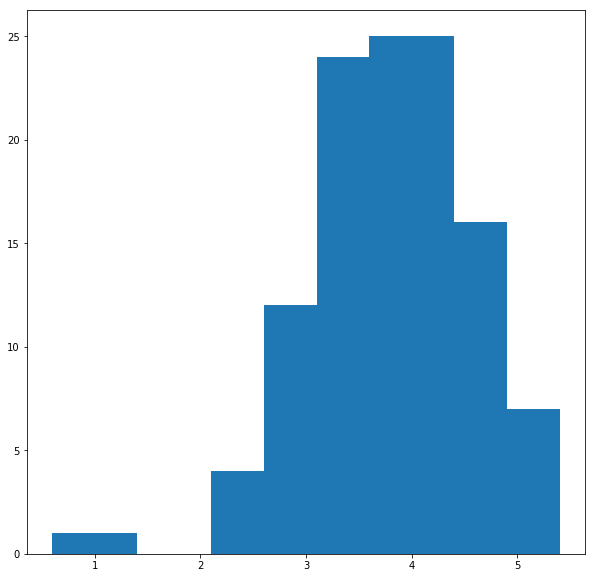

In [352]:
plt.figure(figsize=(10, 10))
plt.bar(business_info_df.star_rating.value_counts().index, business_info_df.star_rating.value_counts().values)
plt.show()

In [28]:
# generate document vectors or word vectors (embeddings)

# you'll need a word embeddings on all the data for modeling

# then make word embeddings for each star category

# tese embeddings should be used to compare 'word' similarities 

# pass a word like 'beer' or 'fish and chips' or 'fish' or 'burger' and look at 'most_similar' or pass in ['good', 'burger']



# make tfidf for each star rating and compare 'important' words across those ratings
# then compare stop words


# Question: How can we leverage yelp data to give us insights on our business? 

In [117]:
business_info_df.num_reviews.astype(int).sum()

6583

In [118]:
search_query_list = ['gastropub']*business_info_df.shape[0]

In [123]:
business_info_df['search_query'] = search_query_list

business_info_df.head()

,address,category,image_shown,name,num_reviews,price_range,star_rating,url,search_query
1,281 New Scotland Ave,"[American (Traditional), Beer Bar]",https://s3-media3.fl.yelpcdn.com/bphoto/H-GObC...,The Albany Ale & Oyster,240.0,$$,4.5,https://www.yelp.com/biz/the-albany-ale-and-oy...,gastropub
2,42 Howard St,"[Bars, American (Traditional), Gastropubs]",https://s3-media2.fl.yelpcdn.com/bphoto/rBAD9u...,The City Beer Hall,489.0,$$,4.0,https://www.yelp.com/biz/the-city-beer-hall-al...,gastropub
3,292 Delaware Ave,[Beer Bar],https://s3-media1.fl.yelpcdn.com/bphoto/vNnnpz...,Delaware Supply,24.0,$$,5.0,https://www.yelp.com/biz/delaware-supply-alban...,gastropub
4,1100 Madison Ave,"[American (New), Pubs]",https://s3-media3.fl.yelpcdn.com/bphoto/_q42sc...,Madison Pour House,125.0,$$,4.5,https://www.yelp.com/biz/madison-pour-house-al...,gastropub
5,1053 Broadway,"[Burgers, Brewpubs]",https://s3-media4.fl.yelpcdn.com/bphoto/wTLrpT...,Druthers Brewing Company,374.0,$$,4.0,https://www.yelp.com/biz/druthers-brewing-comp...,gastropub


## Get reviews for an individual business

In [353]:
def get_reviews(business_name, business_index, yelp_business_url, verbose=False):
    #THIS BLOCK OF CODE GATHERS ALL OF THE REVIEWS FOR A PARTICULAR BUSINESS
    
    #Class names used in Yelp Review pages.
    #There are two flavors of page design that yelp uses
    search_result_class_v1 = "lemon--li__373c0__1r9wz u-space-b3 u-padding-b3 border--bottom__373c0__uPbXS border-color--default__373c0__2oFDT"
    search_result_class_v2 = "review review--with-sidebar"
    
    #Set starting page (first page of reviews)
    next_page_url = yelp_business_url

    reviews_list = []
    page_counter=1

    #Continue to loop through review pages until there is no longer a "next" link at the bottom.
    while next_page_url:
        if verbose:
            #Print the page url being parsed
            print(f"Page {page_counter}, {next_page_url}")

        #Request html for page and load into BeautifulSoup object.
        request = requests.get(next_page_url)
        soup = BeautifulSoup(request.content,'html.parser')
        
        if len(soup.findAll(class_=search_result_class_v1))!=0:
            reviews_list.extend(get_reviews_page_v1(soup,business_name,business_index,verbose))
        elif len(soup.findAll(class_=search_result_class_v2))!=0:
            reviews_list.extend(get_reviews_page_v2(soup,business_name,business_index,verbose))
        else:
            print("Could not parse page: ", next_page_url)
        
        #Check for "next" page link - update next_page_url if found.
        #Break from while loop if there is no next page.
        if soup.find("link", attrs={'rel':'next'}):
            next_page_url = soup.find("link", attrs={'rel':'next'})['href']
            page_counter+=1
        else:
            break
    
    return reviews_list

In [354]:
def get_reviews_page_v1(soup, business_name, business_index, verbose=False):
    search_result_class = "lemon--li__373c0__1r9wz u-space-b3 u-padding-b3 border--bottom__373c0__uPbXS border-color--default__373c0__2oFDT"
    star_container_class = "lemon--div__373c0__1mboc arrange-unit__373c0__1piwO border-color--default__373c0__2oFDT"
    date_class = "lemon--span__373c0__3997G text__373c0__2pB8f text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_"
    pic_class = "lemon--span__373c0__3997G photo-box-grid-item__373c0__2kFqV display--inline__373c0__1DbOG u-space-r2 u-space-b2 border-color--default__373c0__2oFDT"
    pic_url_class = "lemon--img__373c0__3GQUb photo-box-img__373c0__O0tbt"
    
    #Get each review block
    reviews = soup.findAll(class_=search_result_class)
    reviews_list=[]
    skipped_review_counter=0
    #Loop through each review and pull out pertinent information. Put into list of dictionaries.
    for review in reviews:
        try:
            review_info = {}
            review_info["business_name"] = business_name
            review_info["business_index"] = business_index
            review_info["date"] = review.find(class_=date_class).text.strip()
            #review_info["review"] = review.find("span", attrs={"class": "lemon--span__373c0__3997G", "lang": "en"}).text
            review_info["review"] = review.find(attrs={"lang": "en"}).text
            review_info['star_rating'] = float(re.findall(r"[-+]?\d*\.\d+|\d+", 
                           review.find(class_=star_container_class).find('div')['aria-label'] )[0] )
            review_info["pic_count"] = len(review.find_all(class_=pic_class))
            review_info["pic_urls"] = [obj['src'] for obj in review.findAll(class_=pic_url_class)]

            #Sometimes the user id is not being found
            try:
                review_info["user_id"] = review.find('a')['href'].split('userid=')[1]
            except:
                None

            reviews_list.append(review_info)
        except:
            skipped_review_counter+=1
            
    if verbose:
        if skipped_review_counter!=0:
            print(f"Skipped {skipped_review_counter} reviews")

    return(reviews_list)

In [355]:
def get_reviews_page_v2(soup, business_name, business_index, verbose=False):
    search_result_class = "review review--with-sidebar"
    star_container_class = "biz-rating__stars"
    date_class = "rating-qualifier"
    review_photo_box_class = "photo-box-grid clearfix js-content-expandable lightbox-media-parent"
    
    #Get each review block
    reviews = soup.findAll(class_=search_result_class)
    reviews_list=[]
    skipped_review_counter=0
    #Loop through each review and pull out pertinent information. Put into list of dictionaries.
    for review in reviews:
        try:
            review_info = {}
            review_info["business_name"] = business_name
            review_info["business_index"] = business_index
            review_info["date"] = review.find(class_=date_class).text.strip()
            review_info["review"] = review.find(attrs={"lang": "en"}).text
            review_info['star_rating'] = float(re.findall(r"[-+]?\d*\.\d+|\d+", 
                           review.find(class_=star_container_class).find('div')['title'])[0] )
            try:
                pic_line_items = review.find(class_=review_photo_box_class).findAll('li')
                review_info["pic_count"] = len(pic_line_items)
                review_info["pic_urls"] = [obj.find('img')['src'] for obj in pic_line_items]
            except:
                review_info["pic_count"] = 0
                review_info["pic_urls"] = []

            #Sometimes the user id is not being found
            try:
                review_info["user_id"] = review.find('a')['href'].split('userid=')[1]
            except:
                None

            reviews_list.append(review_info)
        except:
            skipped_review_counter+=1

    if verbose:
        if skipped_review_counter!=0:
            print(f"Skipped {skipped_review_counter} reviews")
            
    return(reviews_list)

In [356]:
index_num = 4
business_url = business_info_df.url[index_num]
business_name = business_info_df.name[index_num]
print(business_name)
print(business_url)

Madison Pour House
https://www.yelp.com/biz/madison-pour-house-albany?osq=beer


In [300]:
reviews_df = pd.DataFrame(get_reviews(business_name,business_url,verbose=True))

Page 1, https://www.yelp.com/biz/madison-pour-house-albany?osq=beer
Page 2, https://www.yelp.com/biz/madison-pour-house-albany?osq=beer&start=20
Page 3, https://www.yelp.com/biz/madison-pour-house-albany?osq=beer&start=40
Page 4, https://www.yelp.com/biz/madison-pour-house-albany?osq=beer&start=60
Page 5, https://www.yelp.com/biz/madison-pour-house-albany?osq=beer&start=80
Page 6, https://www.yelp.com/biz/madison-pour-house-albany?osq=beer&start=100
Page 7, https://www.yelp.com/biz/madison-pour-house-albany?osq=beer&start=120


In [301]:
reviews_df.head()

,business_name,date,pic_count,pic_urls,review,star_rating,user_id
0,Madison Pour House,4/28/2019,0,[],My boyfriend and I stumbled upon this place wh...,5.0,NaN
1,Madison Pour House,4/13/2018,3,[https://s3-media3.fl.yelpcdn.com/bphoto/N2rzf...,"Cool, cool vibe here and the pricing structure...",4.0,l3-iufAUr46hmFiEanW88Q
2,Madison Pour House,2/6/2019,0,[],This place has a great selection of beer on th...,3.0,NaN
3,Madison Pour House,4/3/2019,0,[],"Very limited menu, but I think they stick to w...",4.0,NaN
4,Madison Pour House,4/3/2019,0,[],What a dump. I was willing to put up with that...,1.0,NaN


In [302]:
reviews_df.star_rating.value_counts()

5.0    64
4.0    45
3.0    10
1.0     4
2.0     2
Name: star_rating, dtype: int64

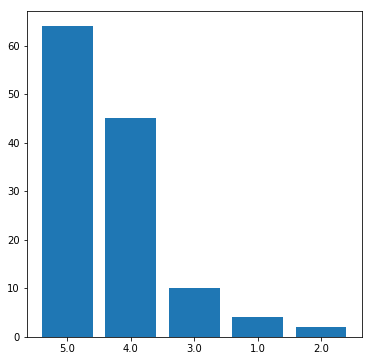

In [303]:
plt.figure(figsize=(6,6))
plt.bar(reviews_df.star_rating.value_counts().index.astype(str), reviews_df.star_rating.value_counts().values)
plt.show()

# Gathering ALL reviews for businesses in initial search
Get all reviews for businesses listed in the `business_info_df`

In [380]:
all_reviews = []
for biz_id, business_name, yelp_url in zip(business_info_df.biz_id,business_info_df.name,business_info_df.url):
    print(business_name, yelp_url)
    all_reviews.extend(get_reviews(business_name,biz_id,yelp_url))

The Albany Ale & Oyster https://www.yelp.com/biz/the-albany-ale-and-oyster-albany?osq=beer
The City Beer Hall https://www.yelp.com/biz/the-city-beer-hall-albany?osq=beer
Delaware Supply https://www.yelp.com/biz/delaware-supply-albany?osq=beer
Druthers Brewing Company https://www.yelp.com/biz/druthers-brewing-company-albany?osq=beer
Madison Pour House https://www.yelp.com/biz/madison-pour-house-albany?osq=beer
Beer Bones Taproom https://www.yelp.com/biz/beer-bones-taproom-latham?osq=beer
Lost & Found https://www.yelp.com/biz/lost-and-found-albany?osq=beer
Fort Orange Brewing https://www.yelp.com/biz/fort-orange-brewing-albany?osq=beer
Wolff’s Biergarten https://www.yelp.com/biz/wolffs-biergarten-albany?osq=beer
Rare Form Brewing Company https://www.yelp.com/biz/rare-form-brewing-company-troy-2?osq=beer
Albany Pump Station At C H Evans Brewing Co https://www.yelp.com/biz/albany-pump-station-at-c-h-evans-brewing-co-albany-2?osq=beer
The Excelsior Pub https://www.yelp.com/biz/the-excelsior

In [378]:
all_reviews_df = pd.DataFrame(all_reviews)
all_reviews_df.shape

(6584, 8)

In [379]:
all_reviews_df.tail()

,business_index,business_name,date,pic_count,pic_urls,review,star_rating,user_id
6579,99-restaurants-rotterdam,99 Restaurants,9/27/2015,0,[],Never disappointed. Have been there at least 2...,4.0,NaN
6580,99-restaurants-rotterdam,99 Restaurants,9/11/2012,0,[],The fish is always fresh. Noticed other restau...,5.0,NaN
6581,99-restaurants-rotterdam,99 Restaurants,6/3/2011,0,[],We went to 99 to celebrate an accomplishment b...,2.0,NaN
6582,99-restaurants-rotterdam,99 Restaurants,1/20/2014,0,[],I enjoyed my meal ALOT only food gets cold fa...,4.0,NaN
6583,99-restaurants-rotterdam,99 Restaurants,1/26/2012,0,[],"99 is close by and consistently good. Yes, th...",4.0,NaN


### Write dataframes to CSV files

In [381]:
business_info_df.to_csv('business_info.csv',index=False)
all_reviews_df.to_csv('reviews.csv',index=False)